In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [9]:
df = pd.read_csv('brain-proteomics.csv')

In [10]:
df.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [11]:
X = df.drop(['Case', 'histological_type', 'race', 'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count', 'Percent.aneuploidy', 'IDH.status', 'outcome'], axis = 1)

X.head()

,years_to_birth,gender,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,31,female,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,51,female,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,22,male,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,38,female,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,33,male,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [12]:
y = df['outcome']
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: outcome, Length: 306, dtype: int64

In [13]:
X 

,years_to_birth,gender,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,31,female,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,51,female,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,22,male,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,38,female,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,33,male,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,30,male,0.034004,-0.073706,-0.233343,0.182469,-0.116130,-0.224590,-0.025644,0.010427,...,-0.166682,-0.072997,0.089271,-0.124620,0.211999,0.037939,-0.022458,-0.335908,-0.126132,0.100600
302,46,male,0.041951,0.265987,0.366885,-0.088258,0.191067,-0.273193,0.142699,-0.009984,...,-0.109752,0.017225,0.012680,-0.006096,0.011010,0.283044,0.126973,0.428842,0.538682,-0.028888
303,36,male,-0.041528,0.049627,0.025368,0.001091,-0.157600,-0.298388,-0.146447,0.052560,...,0.049349,-0.116631,-0.039064,0.219021,0.149160,0.145902,-0.110977,-0.049480,0.140910,-0.035152
304,44,male,-0.029236,-0.030125,-0.085980,0.487722,0.207991,0.089299,0.252555,0.688223,...,0.231609,0.034421,0.310362,0.435813,-0.138360,-0.148706,0.177230,-0.749877,-0.229200,-0.122342


In [14]:
P17_list = ['Syk_p',
 'YAP_pS127_p',
 'AR_p',
 'ACC1_p',
 'YAP_p',
 'HER3_pY1289_p',
 'c-Kit_p',
 'ACC_pS79_p',
 'STAT3_pY705_p',
 'DJ-1_p',
 '53BP1_p',
 'p27_p',
 'PDK1_p',
 'S6_pS235_S236_p',
 'PRDX1_p',
 'Bax_p',
 'IRS1_p']

In [15]:
X_P17 = X[['years_to_birth'] + P17_list]

In [16]:
X_P17

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
0,31,0.545408,0.214148,0.016730,-0.145543,0.162297,0.111073,-1.112035,0.041009,0.895022,0.714738,-1.003871,-0.425127,-0.423440,0.032848,0.398403,-0.004657,-0.022425
1,51,0.675527,-0.114768,-0.102122,-0.849298,-0.072127,-0.121572,0.793610,-0.504137,1.074407,0.130794,-0.557812,0.076536,0.081258,0.890413,0.090886,0.250801,-0.305751
2,22,0.220104,-0.041222,0.337134,-0.130743,0.084505,0.042319,-0.469425,0.103593,0.406837,0.092701,0.256262,0.110268,-0.359613,0.699188,-0.563498,0.257441,-0.159068
3,38,-0.925578,-0.655653,-0.229619,0.419897,-0.105204,0.268635,0.461104,-0.303717,-0.841788,-0.116178,-0.546849,-0.235321,0.542795,-0.427793,-0.119468,-0.422990,0.160395
4,33,0.859092,0.673700,0.179990,-0.010213,0.094573,-0.138702,-0.459420,0.340964,-0.109870,0.463987,0.289628,-0.343212,-0.261908,0.112762,0.783894,0.101332,-0.250936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,30,-0.128812,0.021982,-0.055906,0.327068,-0.019703,-0.136758,-0.025661,0.255484,-0.107341,-0.283738,0.010427,-0.166682,-0.074008,0.138053,-0.006152,0.009879,0.031615
302,46,-0.358774,0.360853,-0.099178,-0.039167,0.016535,-0.138986,0.727578,-0.244715,-0.158577,-0.001360,-0.009984,-0.109752,0.293206,-0.080758,0.269519,-0.083860,0.073649
303,36,0.133690,0.519873,-0.019200,-0.027617,0.114971,-0.057370,0.943504,-0.205712,-0.134070,-0.034662,0.052560,0.049349,-0.033453,-0.140574,0.145317,-0.116833,-0.236958
304,44,0.009651,-0.532270,-0.035892,0.410816,-0.065174,0.039068,-0.160802,0.337514,-0.276682,-0.204027,0.688223,0.231609,0.087901,-0.040498,-0.617406,-0.398254,-0.007339


In [17]:
##### WORKING WITH X_P17 #####

In [18]:
X_P17

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
0,31,0.545408,0.214148,0.016730,-0.145543,0.162297,0.111073,-1.112035,0.041009,0.895022,0.714738,-1.003871,-0.425127,-0.423440,0.032848,0.398403,-0.004657,-0.022425
1,51,0.675527,-0.114768,-0.102122,-0.849298,-0.072127,-0.121572,0.793610,-0.504137,1.074407,0.130794,-0.557812,0.076536,0.081258,0.890413,0.090886,0.250801,-0.305751
2,22,0.220104,-0.041222,0.337134,-0.130743,0.084505,0.042319,-0.469425,0.103593,0.406837,0.092701,0.256262,0.110268,-0.359613,0.699188,-0.563498,0.257441,-0.159068
3,38,-0.925578,-0.655653,-0.229619,0.419897,-0.105204,0.268635,0.461104,-0.303717,-0.841788,-0.116178,-0.546849,-0.235321,0.542795,-0.427793,-0.119468,-0.422990,0.160395
4,33,0.859092,0.673700,0.179990,-0.010213,0.094573,-0.138702,-0.459420,0.340964,-0.109870,0.463987,0.289628,-0.343212,-0.261908,0.112762,0.783894,0.101332,-0.250936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,30,-0.128812,0.021982,-0.055906,0.327068,-0.019703,-0.136758,-0.025661,0.255484,-0.107341,-0.283738,0.010427,-0.166682,-0.074008,0.138053,-0.006152,0.009879,0.031615
302,46,-0.358774,0.360853,-0.099178,-0.039167,0.016535,-0.138986,0.727578,-0.244715,-0.158577,-0.001360,-0.009984,-0.109752,0.293206,-0.080758,0.269519,-0.083860,0.073649
303,36,0.133690,0.519873,-0.019200,-0.027617,0.114971,-0.057370,0.943504,-0.205712,-0.134070,-0.034662,0.052560,0.049349,-0.033453,-0.140574,0.145317,-0.116833,-0.236958
304,44,0.009651,-0.532270,-0.035892,0.410816,-0.065174,0.039068,-0.160802,0.337514,-0.276682,-0.204027,0.688223,0.231609,0.087901,-0.040498,-0.617406,-0.398254,-0.007339


In [19]:
from sklearn.model_selection import train_test_split

# train test split 

X_train, X_val_test, y_train, y_val_test = train_test_split(X_P17, y, test_size=0.35, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test)

In [20]:
X_train.shape, X_val.shape, X_test.shape

((198, 18), (54, 18), (54, 18))

In [21]:
y_train.shape, y_val.shape, y_test.shape

((198,), (54,), (54,))

In [22]:
y_val.value_counts()

outcome
1    32
0    22
Name: count, dtype: int64

In [23]:
y_test.value_counts()

outcome
1    33
0    21
Name: count, dtype: int64

In [115]:
y_train.value_counts()

outcome
1    119
0     79
Name: count, dtype: int64

In [24]:
X_test

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
72,30,-0.154670,0.037914,0.389067,-0.659481,0.081454,0.118655,-0.895722,-0.514651,0.663877,0.515556,-0.540392,0.190858,0.034564,0.088550,1.154459,0.163472,-0.156459
90,18,0.127348,0.533051,0.153497,-1.048337,0.284891,-0.165833,-0.150484,-0.352184,0.246484,0.607291,-0.673140,0.195989,-0.053185,0.454309,0.633863,0.243821,-0.084282
84,52,-0.377659,-0.226249,-0.224713,0.431975,-0.212276,0.858470,0.640792,-0.035745,-0.751058,-0.149207,-0.152001,-0.104785,0.524916,-0.752985,-0.360299,-0.507721,0.206420
283,33,-0.272561,0.257198,-0.034057,0.014315,0.028409,-0.139864,0.013346,0.066376,-0.059639,-0.096496,-0.026394,-0.055638,-0.192506,0.258176,-0.044042,0.019390,0.065793
137,43,0.275906,0.361609,0.075325,-0.222528,0.062478,-0.186824,-0.305706,-0.071113,0.146238,0.277028,-0.047885,0.002782,-0.129090,0.400241,0.133826,-0.030030,0.000000
96,50,0.408438,0.148562,0.415070,0.522773,-0.018670,1.007268,-1.111885,0.536098,1.364884,0.255940,0.875533,1.183426,-0.113850,0.279674,-0.213554,0.283674,-0.052744
214,56,-1.202888,-0.806781,-0.062834,0.412601,-0.127450,0.982880,-0.079785,0.171530,-0.644385,-0.532825,1.481877,0.112842,0.316564,-0.525884,-0.653328,0.396284,0.393098
104,58,0.335961,-0.222200,0.065440,-0.257178,-0.082306,0.010678,-0.531865,0.036376,-0.010820,-0.032658,-0.309737,0.421248,-0.001181,-0.340337,0.037810,-0.322444,-0.061384
165,59,0.469573,0.485666,0.444271,-0.332623,0.031164,-0.085941,-0.707645,0.033622,0.711035,-0.230265,0.550577,-0.256757,-0.230854,1.261705,-0.420556,0.916723,-0.234479
27,31,0.195659,0.344548,0.135501,0.288618,0.013441,-0.029330,-0.433987,0.368957,0.145275,-0.075233,0.230076,0.042079,-0.001189,-0.452819,0.223601,0.066851,-0.223925


In [116]:
# ### Producing Synthetic data SMOTE

y_train.value_counts()[1]*2, y_train.value_counts()[0]*2

(238, 158)

In [117]:
X_train.head()

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
297,43,-0.325965,-0.372402,-0.146252,-0.127154,0.000000,0.099779,0.311747,-0.126940,-0.369135,0.165536,0.203355,0.323936,0.454758,-0.571175,-0.316896,-0.056750,0.073613
0,31,0.545408,0.214148,0.016730,-0.145543,0.162297,0.111073,-1.112035,0.041009,0.895022,0.714738,-1.003871,-0.425127,-0.423440,0.032848,0.398403,-0.004657,-0.022425
213,66,-0.679952,-0.794610,-0.293946,1.345401,-0.206653,0.754975,-0.280903,1.228844,-0.272424,-0.044405,0.977192,1.252329,0.161861,-0.548891,-0.372599,-0.016192,0.185729
209,62,-0.506154,0.161518,-0.161573,-0.995480,0.235823,-0.207525,-0.271456,-0.575539,-0.152587,0.404237,-0.065181,0.320006,-0.291511,-0.350564,0.126449,0.989482,-0.178880
117,32,0.301054,0.693635,0.001346,-0.216724,0.080990,0.134469,0.364764,-0.065827,0.424833,0.510969,-0.512085,-0.185266,-0.170699,0.519529,0.990105,-0.118640,-0.113230


In [118]:
# # Create some new training data with SMOTE

from imblearn.over_sampling import SMOTE

In [119]:
# n_samples = 200  # total number of data points you want for each class

sampler = SMOTE(sampling_strategy={0: y_train.value_counts()[0]*2, 1: y_train.value_counts()[1]*2})     

# resample both minority and majority classes


In [120]:
# reassigning X_train - y_train after SMOTE

X_train, y_train = sampler.fit_resample(X_train, y_train)

In [121]:
y_train.value_counts(normalize=True)

outcome
1    0.60101
0    0.39899
Name: proportion, dtype: float64

In [122]:
X_train

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
0,43,-0.325965,-0.372402,-0.146252,-0.127154,0.000000,0.099779,0.311747,-0.126940,-0.369135,0.165536,0.203355,0.323936,0.454758,-0.571175,-0.316896,-0.056750,0.073613
1,31,0.545408,0.214148,0.016730,-0.145543,0.162297,0.111073,-1.112035,0.041009,0.895022,0.714738,-1.003871,-0.425127,-0.423440,0.032848,0.398403,-0.004657,-0.022425
2,66,-0.679952,-0.794610,-0.293946,1.345401,-0.206653,0.754975,-0.280903,1.228844,-0.272424,-0.044405,0.977192,1.252329,0.161861,-0.548891,-0.372599,-0.016192,0.185729
3,62,-0.506154,0.161518,-0.161573,-0.995480,0.235823,-0.207525,-0.271456,-0.575539,-0.152587,0.404237,-0.065181,0.320006,-0.291511,-0.350564,0.126449,0.989482,-0.178880
4,32,0.301054,0.693635,0.001346,-0.216724,0.080990,0.134469,0.364764,-0.065827,0.424833,0.510969,-0.512085,-0.185266,-0.170699,0.519529,0.990105,-0.118640,-0.113230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,30,0.221918,0.340528,0.199426,0.243527,0.028461,-0.019287,-0.392378,0.302414,0.040284,0.012670,0.112681,0.012904,0.001186,-0.345757,0.293757,0.063889,-0.215644
392,47,0.032059,0.202689,0.031755,0.129327,0.092504,-0.147622,0.060686,-0.324362,-0.094544,-0.014179,-0.153494,-0.161363,0.085132,-0.177494,0.163865,0.138091,-0.001133
393,54,0.156199,0.000559,0.308899,-0.149631,0.262915,-0.097016,-0.695931,-0.358185,0.284825,0.438309,-0.706643,-0.122880,-0.044986,0.698829,0.222017,0.417253,0.067987
394,51,0.908805,-0.349647,-0.023308,-0.288089,-0.054583,0.016753,0.107778,-0.627620,0.410654,0.052490,-0.263215,-0.226401,0.047642,0.673876,-0.189851,0.253270,-0.071826


In [123]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn import set_config

set_config(display = 'diagram')

preproc_numerical = make_pipeline(
    MinMaxScaler()
)
#preproc_categorical = make_pipeline(
#    OrdinalEncoder()
#)

In [124]:
from sklearn.compose import make_column_transformer, make_column_selector

preprocessor = make_column_transformer(
#    (preproc_categorical, ['gender']),
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"]))
)

preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fa8a6cc1c00>)])

In [125]:
X_train = preprocessor.fit_transform(X_train)

In [126]:
X_train

array([[0.40277778, 0.41337174, 0.2867023 , ..., 0.20577605, 0.32527296,
        0.55757669],
       [0.23611111, 0.70891565, 0.48422222, ..., 0.59188798, 0.35241992,
        0.47861767],
       [0.72222222, 0.29331005, 0.14452447, ..., 0.17570812, 0.34640896,
        0.64975342],
       ...,
       [0.55555556, 0.57690742, 0.41229626, ..., 0.49667601, 0.57228977,
        0.55295112],
       [0.51388889, 0.83216883, 0.29436519, ..., 0.27435375, 0.48683348,
        0.43800243],
       [0.48611111, 0.78030957, 0.37109783, ..., 0.2831743 , 0.57243521,
        0.42814019]])

In [127]:
X_train.shape

(396, 18)

In [128]:
y_train

0      0
1      1
2      0
3      0
4      1
      ..
391    1
392    1
393    1
394    1
395    1
Name: outcome, Length: 396, dtype: int64

In [129]:
X_val = preprocessor.transform(X_val)

X_test = preprocessor.transform(X_test)

In [130]:
features_P17_age = X_P17.columns

### PCA ----- X_train_proj 18 PCs

In [131]:
### PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

In [132]:
W = pca.components_

In [133]:
# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=features_P17_age,
                 columns=[f'PC{i}' for i in range(1, 19)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
years_to_birth,0.088887,-0.220365,0.875429,0.103453,-0.004953,-0.273514,0.077844,-0.055662,0.066137,-0.001675,-0.113019,-0.085249,0.108674,0.006610,0.160716,-0.119708,0.076787,0.011901
Syk_p,-0.372752,-0.133819,-0.032821,-0.179320,-0.413866,-0.085024,-0.061450,0.405714,-0.250833,0.279476,-0.468052,-0.240887,0.171123,0.031159,-0.116611,0.031682,0.005110,-0.004142
YAP_pS127_p,-0.254053,0.132015,-0.097102,0.183835,-0.007149,-0.121804,0.042030,-0.232478,0.412731,0.076079,-0.136496,-0.281162,-0.168660,0.337863,-0.181029,-0.427298,-0.119277,0.397626
AR_p,-0.360124,-0.044676,0.000483,-0.070505,-0.031793,-0.199801,-0.210595,0.273598,0.441485,0.164531,0.124216,0.606401,-0.017906,0.024257,0.306362,0.013831,-0.045745,0.032005
ACC1_p,0.212151,-0.252707,-0.177224,0.038576,-0.189502,-0.394972,-0.049241,0.104199,0.032979,-0.140872,0.211598,-0.035007,-0.029043,0.195260,-0.144774,0.241211,0.596628,0.334708
YAP_p,-0.157954,0.143817,0.073174,0.107433,0.072739,0.078567,-0.080690,0.005356,0.294257,0.076463,-0.063724,-0.121017,-0.197632,0.163445,-0.228166,0.065284,0.458764,-0.689760
HER3_pY1289_p,0.183831,-0.077502,-0.032170,0.019584,0.148101,0.123324,0.324014,0.130551,-0.293624,0.378181,-0.137950,0.160906,-0.457706,0.426884,0.327816,-0.096952,0.125476,0.033468
c-Kit_p,0.285958,0.192770,-0.094237,-0.030510,-0.460034,-0.022804,0.394200,-0.232145,0.371087,0.357068,-0.018446,-0.081211,0.196535,-0.064355,0.218925,0.279179,-0.053698,-0.078494
ACC_pS79_p,0.098155,-0.349982,-0.159494,0.243667,0.022764,-0.383188,0.000391,-0.032867,-0.101323,0.094291,0.193706,0.018393,0.179474,0.379541,-0.167010,0.016707,-0.471660,-0.388226
STAT3_pY705_p,-0.253619,-0.352422,-0.043962,-0.181232,0.173278,0.132717,0.723778,0.227516,0.220585,-0.255669,0.103820,-0.037000,0.077725,-0.062255,-0.127955,-0.013598,0.005087,-0.027744


In [134]:
#### X_train_proj with 19 PCs

X_train_proj = pca.transform(X_train)
X_train_proj = pd.DataFrame(X_train_proj, columns=[f'PC{i}' for i in range(1, 19)])
X_train_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.417888,0.134323,0.068433,0.014729,-0.066376,0.175124,-0.108084,0.178639,0.026213,-0.029925,0.041905,0.008977,0.014595,-0.025835,-0.031404,-0.072021,-0.043501,-0.044156
1,-0.558493,0.202071,-0.103893,-0.133152,0.234986,-0.052555,0.196650,0.159268,-0.248177,-0.206194,0.139365,-0.161932,0.155293,0.273482,0.072276,0.036303,0.072600,-0.040378
2,0.769574,-0.518876,0.141357,0.482090,0.171622,-0.079286,-0.063172,0.276174,-0.133665,0.150308,0.141110,0.004663,-0.012713,0.070026,-0.055369,0.040385,0.036412,0.023495
3,-0.212747,0.215810,0.455544,0.391079,0.020489,0.402249,-0.026696,-0.166014,-0.035397,-0.139989,0.065090,-0.033411,0.078441,0.014751,0.023676,0.095154,-0.003693,0.031860
4,-0.434014,0.369407,-0.156323,0.033991,-0.000291,-0.277522,0.334915,-0.063268,-0.137849,-0.000107,0.091838,-0.144947,-0.083102,-0.002671,0.077756,0.004060,-0.004553,0.001702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-0.151501,0.049836,-0.202892,0.157041,-0.071728,-0.085023,-0.023570,0.073706,-0.035078,-0.087971,-0.019209,0.182030,0.052215,0.079804,-0.092488,-0.092744,0.012980,0.010923
392,-0.034941,0.143009,0.088242,-0.022090,-0.068989,-0.037421,-0.036150,-0.034413,0.046168,-0.124674,-0.069876,0.034075,0.010988,0.017107,-0.038331,0.024643,0.064796,0.047199
393,-0.452670,0.114908,0.306521,-0.165705,0.067492,-0.064707,-0.037421,0.039444,-0.025622,-0.043463,0.230043,-0.020274,-0.110446,0.047632,0.043964,0.151079,0.052677,-0.008678
394,-0.244269,-0.083894,0.203998,-0.350527,-0.185063,0.125594,0.067629,-0.003301,-0.150379,0.060566,-0.017495,-0.084580,0.002018,-0.112390,0.023206,0.056293,0.059201,0.025430


In [135]:
# Transforming X_val to PC projections

X_val_proj = pca.transform(X_val)
X_val_proj = pd.DataFrame(X_val_proj, columns=[f'PC{i}' for i in range(1, 19)])
X_val_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.359158,-0.050192,0.285414,-0.041004,-0.245928,-0.113485,0.091668,0.116779,0.044656,-0.028909,-0.216955,-0.127328,0.046656,-0.000159,0.074336,-0.019402,-0.040038,-0.057206
1,0.097854,-0.060858,-0.224516,-0.120387,-0.306093,0.011047,-0.268916,0.098864,0.072482,0.073698,-0.158532,0.173115,0.017965,0.043061,0.074430,-0.040284,-0.066721,-0.074003
2,-0.423517,-0.004653,0.463527,-0.002469,-0.158835,-0.085161,0.189608,0.002561,-0.009943,0.019845,-0.105081,-0.094939,-0.105035,0.124002,-0.011247,-0.116721,0.030053,0.020889
3,-0.073420,-0.129777,0.050113,0.236605,0.081996,0.202717,-0.120409,0.195744,-0.084707,0.293202,0.280658,0.300969,0.327732,-0.109610,0.202970,0.218519,0.084858,0.147708
4,0.108913,-0.177169,-0.015541,-0.203504,-0.091737,0.138483,-0.169943,-0.016079,-0.139891,0.055067,0.229178,-0.011744,0.162181,0.032623,-0.087398,-0.029865,-0.080409,-0.020774


In [136]:
# Transforming X_test to PC projections

X_test_proj = pca.transform(X_test)
X_test_proj = pd.DataFrame(X_test_proj, columns=[f'PC{i}' for i in range(1, 19)])
X_test_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.796533,-0.463692,0.117132,0.205490,0.065795,0.282182,-0.250499,0.015776,0.083863,-0.067933,-0.157639,0.239535,-0.396282,0.050138,0.217605,0.084488,-0.038881,-0.006786
1,0.618326,-0.244332,-0.054214,0.158709,-0.149798,-0.075306,0.012390,-0.151471,0.087902,-0.098878,-0.015948,-0.060280,-0.200718,0.041561,0.136255,0.042681,-0.069629,0.020668
2,0.037799,-0.055733,-0.206845,-0.065067,0.023731,-0.059130,-0.096570,-0.167942,-0.028552,-0.069338,-0.016469,0.045791,0.020534,0.002710,-0.094524,0.073700,-0.002272,-0.005352
3,0.387179,0.186944,-0.175283,-0.037494,0.288258,-0.034634,-0.195621,-0.095264,0.045085,0.092922,-0.133331,0.138655,0.043881,0.015231,-0.049803,-0.005111,-0.049568,0.002606
4,-0.350358,-0.046321,-0.041898,-0.081463,-0.039635,-0.031401,-0.012035,0.112022,-0.071771,-0.083964,-0.022256,0.007702,-0.102372,-0.056196,-0.079837,-0.074004,-0.003726,0.004476


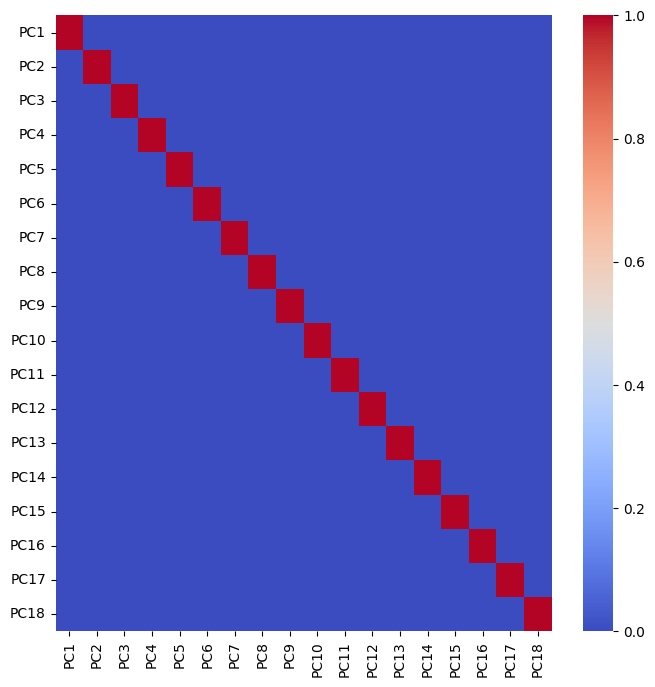

In [137]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train_proj.corr(), cmap='coolwarm');

In [138]:
# # Computational proof
# W = pca.components_.T
# print("Shape of W: ", W.shape)
# print("Shape of X_train", X_train.shape)

In [139]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X_train.T,X_train))

In [140]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([0.30560184, 0.17636594, 0.08224199, 0.07338724, 0.05477944,
       0.04848817, 0.04474832, 0.04230993, 0.0363603 , 0.02373328,
       0.02174567, 0.01952207, 0.01790278, 0.01627947, 0.01316872,
       0.01244465, 0.00639053, 0.00452966])

In [141]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.305602
1,0.176366
2,0.082242
3,0.073387
4,0.054779
5,0.048488
6,0.044748
7,0.042310
8,0.036360
9,0.023733


In [142]:
pd.DataFrame(pca.explained_variance_ratio_)[0].sum()

1.0000000000000002

In [143]:
pd.DataFrame(pca.explained_variance_ratio_).iloc[0:6][0].sum()

0.7408646211486248

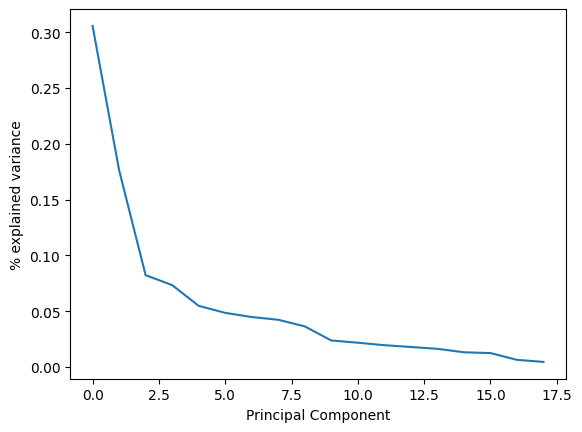

In [144]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

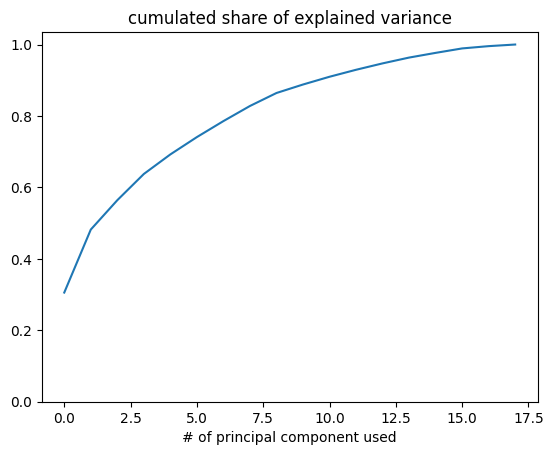

In [145]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

### Stochastic Gradient Descent Classifier on X_train_proj (18 PCs)

In [146]:
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
# # Initialize the SGDClassifier
# sgd = SGDClassifier()

# # Define the grid of parameters to search
# param_grid = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
# }

In [149]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_proj, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_sgd = best_estimator.predict(X_val_proj)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_sgd)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_sgd))

In [150]:
# SGD Classifier for X_train_proj (18 PCs)

## Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}

In [151]:
sgd_X_proj = SGDClassifier(alpha=0.001, loss='hinge', penalty='elasticnet')

sgd_X_proj.fit(X_train_proj, y_train)

# Make predictions
y_pred_sgd_X_proj = sgd_X_proj.predict(X_val_proj)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_sgd_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sgd_X_proj))

Accuracy: 0.7037037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.74      0.78      0.76        32

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [152]:
cm = confusion_matrix(y_val, y_pred_sgd_X_proj, labels=sgd_X_proj.classes_)
cm

array([[13,  9],
       [ 7, 25]])

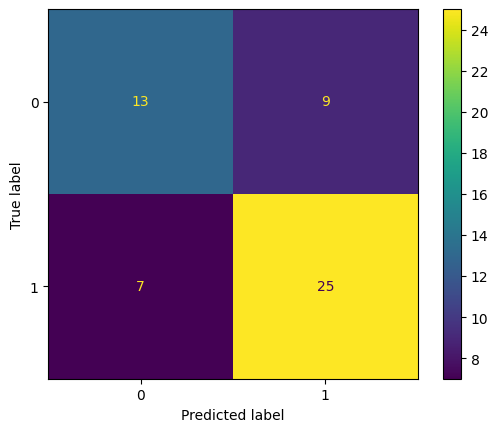

In [153]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_X_proj.classes_)
disp.plot();

### Support Vector Classifier on X_train_proj (18 PCs)

In [154]:
from sklearn.svm import SVC

In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
# # Initialize the Support Vector Classifier
# svc = SVC()

# # Define the grid of parameters to search
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
# }

In [157]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_proj, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_svc = best_estimator.predict(X_val_proj)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_svc)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_svc))

In [158]:
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [159]:
# instantiate
svc_X_proj = SVC(kernel='rbf', C=10, gamma='scale', probability=True)

# Train the classifier
svc_X_proj.fit(X_train_proj, y_train)

SVC(C=10, probability=True)

In [160]:
# Make predictions
y_pred_svc_X_proj = svc_X_proj.predict(X_val_proj)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svc_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svc_X_proj))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        22
           1       0.72      0.72      0.72        32

    accuracy                           0.67        54
   macro avg       0.65      0.65      0.65        54
weighted avg       0.67      0.67      0.67        54



In [161]:
cm = confusion_matrix(y_val, y_pred_svc_X_proj, labels=svc_X_proj.classes_)
cm

array([[13,  9],
       [ 9, 23]])

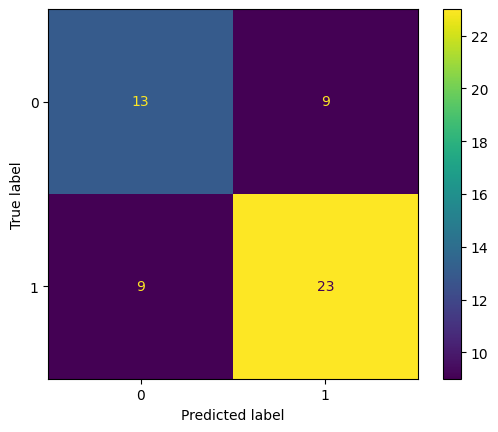

In [162]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_X_proj.classes_)
disp.plot();

### Logistic Regression on X_train_proj (18 PCs)

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [164]:
log_reg_model_X_proj = LogisticRegression(max_iter=1000)

log_reg_model_X_proj.fit(X_train_proj, y_train)

LogisticRegression(max_iter=1000)

In [165]:
y_pred_log_X_proj = log_reg_model_X_proj.predict(X_val_proj)

In [166]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_X_proj)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_X_proj))

Accuracy: 0.7037037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.74      0.78      0.76        32

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [167]:
cm = confusion_matrix(y_val, y_pred_log_X_proj, labels=log_reg_model_X_proj.classes_)
cm

array([[13,  9],
       [ 7, 25]])

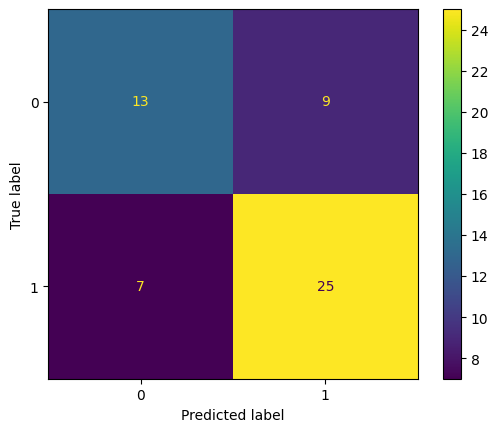

In [168]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model_X_proj.classes_)
disp.plot();

### Stochastic Gradient Descent Classifier on X_train (17 proteins + age)

In [169]:
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
# # Initialize the SGDClassifier
# sgd = SGDClassifier()

# # Define the grid of parameters to search
# param_grid = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
# }

In [172]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_sgd = best_estimator.predict(X_val)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_sgd)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_sgd))

In [173]:
## Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}

In [174]:
sgd_X = SGDClassifier(alpha=0.001, loss='hinge', penalty='l1')

sgd_X.fit(X_train, y_train)

# Make predictions
y_pred_sgd_X = sgd_X.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_sgd_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sgd_X))

Accuracy: 0.6851851851851852

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        22
           1       0.76      0.69      0.72        32

    accuracy                           0.69        54
   macro avg       0.68      0.68      0.68        54
weighted avg       0.69      0.69      0.69        54



In [175]:
cm = confusion_matrix(y_val, y_pred_sgd_X, labels=sgd_X.classes_)
cm

array([[15,  7],
       [10, 22]])

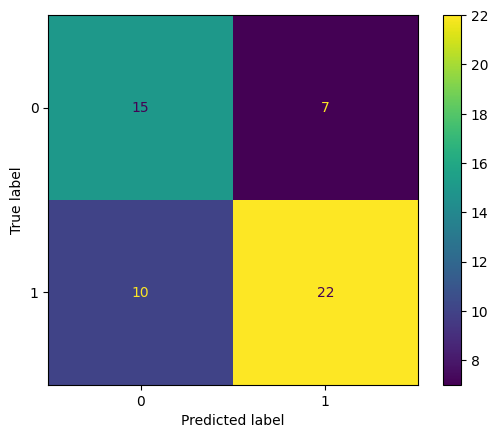

In [176]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_X.classes_)
disp.plot();

### Support Vector Classifier on X_train (17 proteins + age)

In [177]:
from sklearn.svm import SVC

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
# # Initialize the Support Vector Classifier
# svc = SVC()

# # Define the grid of parameters to search
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
# }

In [180]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_svc = best_estimator.predict(X_val)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_svc)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_svc))

In [181]:
# Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [182]:
# instantiate
svc_X = SVC(kernel='rbf', C=10, gamma='scale', probability=True)

# Train the classifier
svc_X.fit(X_train, y_train)

SVC(C=10, probability=True)

In [183]:
# Make predictions
y_pred_svc_X = svc_X.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svc_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svc_X))

Accuracy: 0.7037037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.74      0.78      0.76        32

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [184]:
cm = confusion_matrix(y_val, y_pred_svc_X, labels=svc_X.classes_)
cm

array([[13,  9],
       [ 7, 25]])

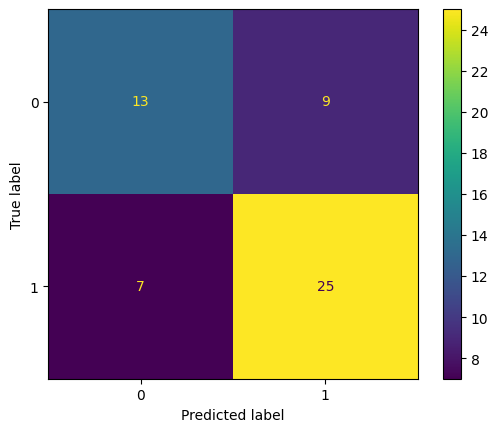

In [185]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_X.classes_)
disp.plot();

### Logistic Regression on X_train (17 proteins + age)

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [187]:
log_reg_model_X = LogisticRegression(max_iter=1000)

log_reg_model_X.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [188]:
y_pred_log_X = log_reg_model_X.predict(X_val)

In [189]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_X))

Accuracy: 0.7037037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.74      0.78      0.76        32

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [190]:
cm = confusion_matrix(y_val, y_pred_log_X, labels=log_reg_model_X.classes_)
cm

array([[13,  9],
       [ 7, 25]])

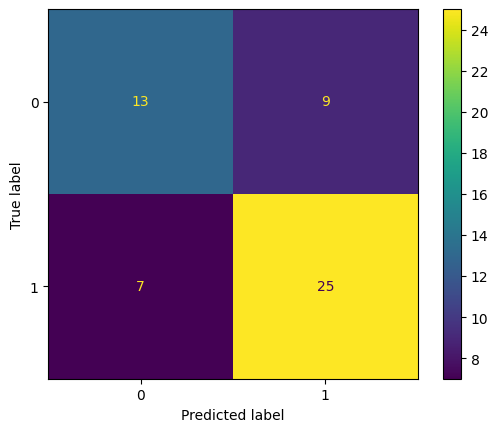

In [191]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model_X.classes_)
disp.plot();

### USING ONLY 6 PCs

In [192]:
X_train

array([[0.40277778, 0.41337174, 0.2867023 , ..., 0.20577605, 0.32527296,
        0.55757669],
       [0.23611111, 0.70891565, 0.48422222, ..., 0.59188798, 0.35241992,
        0.47861767],
       [0.72222222, 0.29331005, 0.14452447, ..., 0.17570812, 0.34640896,
        0.64975342],
       ...,
       [0.55555556, 0.57690742, 0.41229626, ..., 0.49667601, 0.57228977,
        0.55295112],
       [0.51388889, 0.83216883, 0.29436519, ..., 0.27435375, 0.48683348,
        0.43800243],
       [0.48611111, 0.78030957, 0.37109783, ..., 0.2831743 , 0.57243521,
        0.42814019]])

In [193]:
#### X_train_proj6 with 6 PCs

# Fit a PCA with 30 components
pca6 = PCA(n_components=6).fit(X_train)

# Project your data into 25 dimensions
X_train_proj6 = pd.DataFrame(pca6.fit_transform(X_train), columns=[f'PC{i}' for i in range(1, 7)])

# We have "compressed" our dataset in 30D
X_train_proj6

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.417888,0.134323,0.068433,0.014729,-0.066376,0.175124
1,-0.558493,0.202071,-0.103893,-0.133152,0.234986,-0.052555
2,0.769574,-0.518876,0.141357,0.482090,0.171622,-0.079286
3,-0.212747,0.215810,0.455544,0.391079,0.020489,0.402249
4,-0.434014,0.369407,-0.156323,0.033991,-0.000291,-0.277522
...,...,...,...,...,...,...
391,-0.151501,0.049836,-0.202892,0.157041,-0.071728,-0.085023
392,-0.034941,0.143009,0.088242,-0.022090,-0.068989,-0.037421
393,-0.452670,0.114908,0.306521,-0.165705,0.067492,-0.064707
394,-0.244269,-0.083894,0.203998,-0.350527,-0.185063,0.125594


In [194]:
pca6.components_

array([[ 8.88866988e-02, -3.72752133e-01, -2.54053247e-01,
        -3.60123664e-01,  2.12151237e-01, -1.57954245e-01,
         1.83831057e-01,  2.85958069e-01,  9.81548155e-02,
        -2.53619458e-01, -1.53438871e-01,  1.22793436e-01,
         1.03127591e-01,  3.48018970e-01, -2.96628765e-01,
        -2.28008143e-01, -2.41693699e-01,  1.75144893e-01],
       [-2.20364636e-01, -1.33819196e-01,  1.32015219e-01,
        -4.46757911e-02, -2.52706939e-01,  1.43817231e-01,
        -7.75024251e-02,  1.92769974e-01, -3.49982214e-01,
        -3.52421802e-01,  2.81262053e-01, -4.54105482e-01,
         1.13966883e-02,  1.80147805e-01, -2.34735616e-01,
         3.91523650e-01, -1.12391564e-01, -2.79545840e-02],
       [ 8.75428595e-01, -3.28206433e-02, -9.71024362e-02,
         4.82908443e-04, -1.77224393e-01,  7.31741215e-02,
        -3.21704934e-02, -9.42373027e-02, -1.59493956e-01,
        -4.39617977e-02,  5.42743677e-02, -2.06405967e-01,
         8.10427853e-02,  1.71402131e-01,  3.06183654e

In [195]:
W6 = pca6.components_

In [196]:
# Print PCs as COLUMNS
W6 = pd.DataFrame(W6.T,
                 index=X_P17.columns,
                 columns=[f'PC{i}' for i in range(1, 7)])
W6

,PC1,PC2,PC3,PC4,PC5,PC6
years_to_birth,0.088887,-0.220365,0.875429,0.103453,-0.004953,-0.273514
Syk_p,-0.372752,-0.133819,-0.032821,-0.179320,-0.413866,-0.085024
YAP_pS127_p,-0.254053,0.132015,-0.097102,0.183835,-0.007149,-0.121804
AR_p,-0.360124,-0.044676,0.000483,-0.070505,-0.031793,-0.199801
ACC1_p,0.212151,-0.252707,-0.177224,0.038576,-0.189502,-0.394972
YAP_p,-0.157954,0.143817,0.073174,0.107433,0.072739,0.078567
HER3_pY1289_p,0.183831,-0.077502,-0.032170,0.019584,0.148101,0.123324
c-Kit_p,0.285958,0.192770,-0.094237,-0.030510,-0.460034,-0.022804
ACC_pS79_p,0.098155,-0.349982,-0.159494,0.243667,0.022764,-0.383188
STAT3_pY705_p,-0.253619,-0.352422,-0.043962,-0.181232,0.173278,0.132717


In [197]:
#### X_train_proj6 with 6 PCs

X_train_proj6 = pca6.transform(X_train)
X_train_proj6 = pd.DataFrame(X_train_proj6, columns=[f'PC{i}' for i in range(1, 7)])
X_train_proj6

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.417888,0.134323,0.068433,0.014729,-0.066376,0.175124
1,-0.558493,0.202071,-0.103893,-0.133152,0.234986,-0.052555
2,0.769574,-0.518876,0.141357,0.482090,0.171622,-0.079286
3,-0.212747,0.215810,0.455544,0.391079,0.020489,0.402249
4,-0.434014,0.369407,-0.156323,0.033991,-0.000291,-0.277522
...,...,...,...,...,...,...
391,-0.151501,0.049836,-0.202892,0.157041,-0.071728,-0.085023
392,-0.034941,0.143009,0.088242,-0.022090,-0.068989,-0.037421
393,-0.452670,0.114908,0.306521,-0.165705,0.067492,-0.064707
394,-0.244269,-0.083894,0.203998,-0.350527,-0.185063,0.125594


In [198]:
# Transforming X_val to 6 PC projections

X_val_proj6 = pca6.transform(X_val)
X_val_proj6 = pd.DataFrame(X_val_proj6, columns=[f'PC{i}' for i in range(1, 7)])
X_val_proj6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.359158,-0.050192,0.285414,-0.041004,-0.245928,-0.113485
1,0.097854,-0.060858,-0.224516,-0.120387,-0.306093,0.011047
2,-0.423517,-0.004653,0.463527,-0.002469,-0.158835,-0.085161
3,-0.073420,-0.129777,0.050113,0.236605,0.081996,0.202717
4,0.108913,-0.177169,-0.015541,-0.203504,-0.091737,0.138483


In [199]:
# Transforming X_test to 6 PC projections

X_test_proj6 = pca6.transform(X_test)
X_test_proj6 = pd.DataFrame(X_test_proj6, columns=[f'PC{i}' for i in range(1, 7)])
X_test_proj6.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.796533,-0.463692,0.117132,0.205490,0.065795,0.282182
1,0.618326,-0.244332,-0.054214,0.158709,-0.149798,-0.075306
2,0.037799,-0.055733,-0.206845,-0.065067,0.023731,-0.059130
3,0.387179,0.186944,-0.175283,-0.037494,0.288258,-0.034634
4,-0.350358,-0.046321,-0.041898,-0.081463,-0.039635,-0.031401


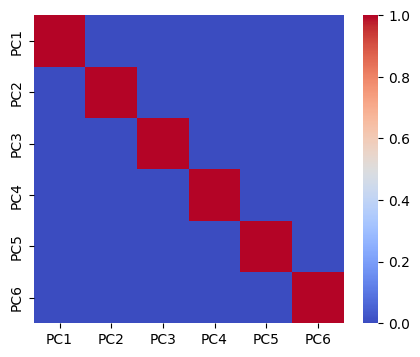

In [200]:
plt.figure(figsize=(5,4))
sns.heatmap(X_train_proj6.corr(), cmap='coolwarm');

In [201]:
# # Computational proof
# W = pca.components_.T
# print("Shape of W: ", W.shape)
# print("Shape of X_train", X_train.shape)

In [202]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X_train.T,X_train))

In [203]:
# Sklearn provides it automatically
pca6.explained_variance_ratio_

array([0.30560184, 0.17636594, 0.08224199, 0.07338724, 0.05477944,
       0.04848817])

In [204]:
pd.DataFrame(pca6.explained_variance_ratio_)

,0
0,0.305602
1,0.176366
2,0.082242
3,0.073387
4,0.054779
5,0.048488


In [205]:
pd.DataFrame(pca6.explained_variance_ratio_)[0].sum()

0.7408646211486248

In [206]:
pd.DataFrame(pca.explained_variance_ratio_).iloc[0:6][0].sum()

0.7408646211486248

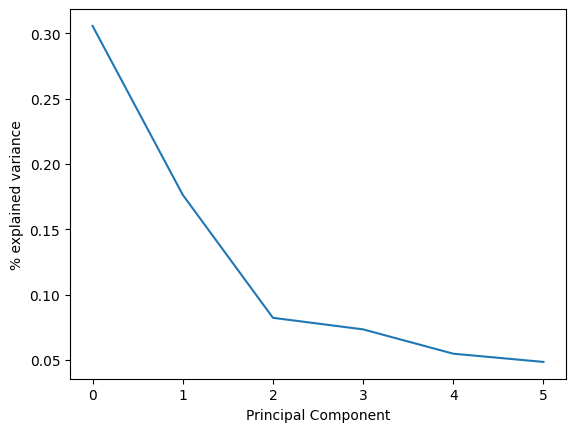

In [207]:
plt.plot(pca6.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

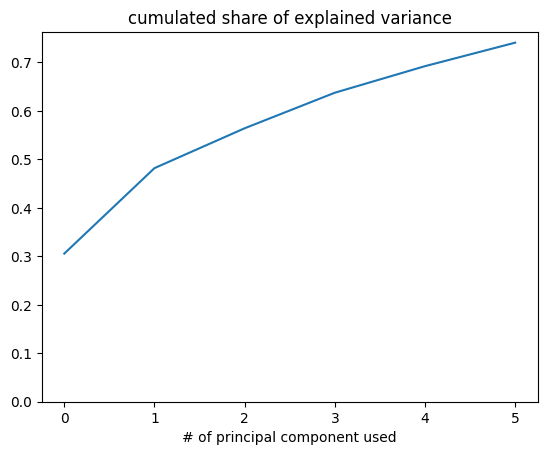

In [208]:
plt.plot(np.cumsum(pca6.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

### SGD Classifier on X_train_proj6 6 PCs

In [209]:
# # Initialize the SGDClassifier
# sgd = SGDClassifier()

# # Define the grid of parameters to search
# param_grid = {
#     'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
#     'penalty': ['l2', 'l1', 'elasticnet'],
#     'alpha': [0.0001, 0.001, 0.01, 0.1],
# }

In [210]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_proj6, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_sgd = best_estimator.predict(X_val_proj6)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_sgd)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_sgd))

In [211]:
## Best Parameters: {'alpha': 0.001, 'loss': 'squared_hinge', 'penalty': 'elasticnet'}

## Best Parameters: {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l2'}

In [212]:
sgd_X_proj6 = SGDClassifier(alpha=0.001, loss='squared_hinge', penalty='elasticnet')

sgd_X_proj6.fit(X_train_proj6, y_train)

# Make predictions
y_pred_sgd_Xproj6 = sgd_X_proj6.predict(X_val_proj6)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_sgd_Xproj6)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sgd_Xproj6))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        22
           1       0.69      0.78      0.74        32

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.66      0.67      0.66        54



In [213]:
cm = confusion_matrix(y_val, y_pred_sgd_Xproj6, labels=sgd_X_proj6.classes_)
cm

array([[11, 11],
       [ 7, 25]])

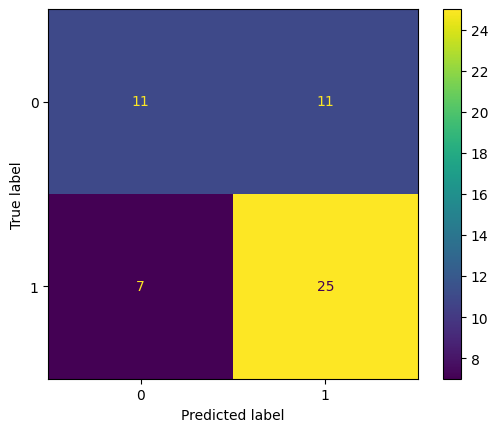

In [214]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_X_proj6.classes_)
disp.plot();

### Support Vector Classifier on X_train_proj6

In [215]:
from sklearn.svm import SVC

In [216]:
from sklearn.model_selection import GridSearchCV

In [217]:
# # Initialize the Support Vector Classifier
# svc = SVC()

# # Define the grid of parameters to search
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
# }

In [218]:
# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_proj6, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best estimator
# best_estimator = grid_search.best_estimator_

# # Make predictions
# predictions_svc = best_estimator.predict(X_val_proj6)

# # Evaluate the model
# accuracy = accuracy_score(y_val, predictions_svc)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_val, predictions_svc))

In [219]:
# Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [220]:
# instantiate
svc_X_proj6 = SVC(kernel='rbf', C=10, gamma='scale', probability=True)

# Train the classifier
svc_X_proj6.fit(X_train_proj6, y_train)

SVC(C=10, probability=True)

In [221]:
# Make predictions
y_pred_svc_X_proj6 = svc_X_proj6.predict(X_val_proj6)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svc_X_proj6)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svc_X_proj6))

Accuracy: 0.5925925925925926

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        22
           1       0.65      0.69      0.67        32

    accuracy                           0.59        54
   macro avg       0.57      0.57      0.57        54
weighted avg       0.59      0.59      0.59        54



In [222]:
cm = confusion_matrix(y_val, y_pred_svc_X_proj6, labels=svc_X_proj6.classes_)
cm

array([[10, 12],
       [10, 22]])

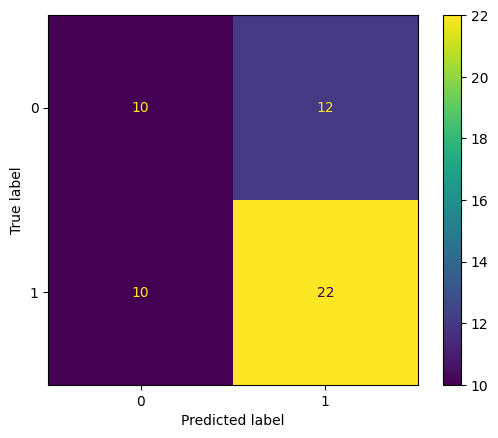

In [223]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_X_proj6.classes_)
disp.plot();

### Logistic Regression on X_train_proj6 (6 PCs)

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [225]:
log_reg_model_X_proj6 = LogisticRegression(max_iter=1000)

log_reg_model_X_proj6.fit(X_train_proj6, y_train)

LogisticRegression(max_iter=1000)

In [226]:
y_pred_log_X_proj6 = log_reg_model_X_proj6.predict(X_val_proj6)

In [227]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_X_proj6)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_X_proj6))

Accuracy: 0.6481481481481481

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        22
           1       0.69      0.75      0.72        32

    accuracy                           0.65        54
   macro avg       0.63      0.62      0.63        54
weighted avg       0.64      0.65      0.64        54



In [228]:
cm = confusion_matrix(y_val, y_pred_log_X_proj6, labels=log_reg_model_X_proj6.classes_)
cm

array([[11, 11],
       [ 8, 24]])

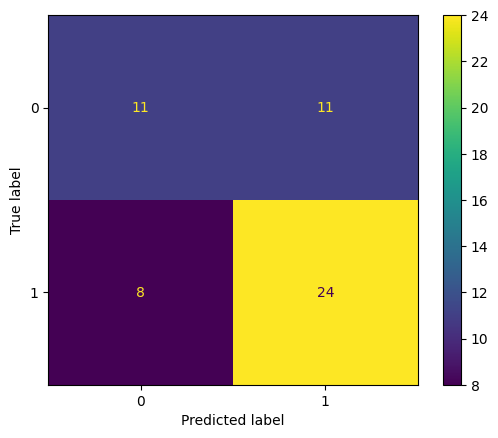

In [229]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model_X_proj6.classes_)
disp.plot();

### USING THE TEST SET FOR FINAL EVALUATION ###

In [230]:
svc_X

SVC(C=10, probability=True)

In [231]:
# Make predictions on test set
y_pred_svc_X_test = svc_X.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc_X_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc_X_test))

Accuracy: 0.6481481481481481

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.54        21
           1       0.71      0.73      0.72        33

    accuracy                           0.65        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.65      0.65      0.65        54



In [232]:
# svc_X_proj

In [233]:
# # Make predictions on test set
# y_pred_svc_X_proj_test = svc_X_proj.predict(X_test_proj)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_svc_X_proj_test)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_svc_X_proj_test))

In [234]:
# svc_X_proj6

In [235]:
# # Make predictions on test set
# y_pred_svc_X_proj6_test = svc_X_proj6.predict(X_test_proj6)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred_svc_X_proj6_test)
# print("Accuracy:", accuracy)

# # Classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_svc_X_proj6_test))

In [236]:
sgd_X

SGDClassifier(alpha=0.001, penalty='l1')

In [237]:
# Make predictions on test set
y_pred_sgd_X_test = sgd_X.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sgd_X_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd_X_test))

Accuracy: 0.6481481481481481

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        21
           1       0.75      0.64      0.69        33

    accuracy                           0.65        54
   macro avg       0.64      0.65      0.64        54
weighted avg       0.67      0.65      0.65        54



In [238]:
sgd_X_proj

SGDClassifier(alpha=0.001, penalty='elasticnet')

In [239]:
# Make predictions on test set
y_pred_sgd_Xproj_test = sgd_X_proj.predict(X_test_proj)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sgd_Xproj_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd_Xproj_test))

Accuracy: 0.7037037037037037

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        21
           1       0.73      0.82      0.77        33

    accuracy                           0.70        54
   macro avg       0.69      0.67      0.68        54
weighted avg       0.70      0.70      0.70        54



In [240]:
sgd_X_proj6

SGDClassifier(alpha=0.001, loss='squared_hinge', penalty='elasticnet')

In [241]:
# Make predictions on test set
y_pred_sgd_Xproj6_test = sgd_X_proj6.predict(X_test_proj6)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_sgd_Xproj6_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sgd_Xproj6_test))

Accuracy: 0.6851851851851852

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        21
           1       0.74      0.76      0.75        33

    accuracy                           0.69        54
   macro avg       0.67      0.66      0.67        54
weighted avg       0.68      0.69      0.68        54



In [242]:
log_reg_model_X

LogisticRegression(max_iter=1000)

In [243]:
y_pred_log_X_test = log_reg_model_X.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_X_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_X_test))

Accuracy: 0.7222222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59        21
           1       0.74      0.85      0.79        33

    accuracy                           0.72        54
   macro avg       0.71      0.69      0.69        54
weighted avg       0.72      0.72      0.71        54



In [244]:
log_reg_model_X_proj

LogisticRegression(max_iter=1000)

In [245]:
y_pred_log_X_proj_test = log_reg_model_X_proj.predict(X_test_proj)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_X_proj_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_X_proj_test))

Accuracy: 0.7222222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59        21
           1       0.74      0.85      0.79        33

    accuracy                           0.72        54
   macro avg       0.71      0.69      0.69        54
weighted avg       0.72      0.72      0.71        54



In [246]:
log_reg_model_X_proj6

LogisticRegression(max_iter=1000)

In [247]:
y_pred_log_X_proj6_test = log_reg_model_X_proj6.predict(X_test_proj6)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_X_proj6_test)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_X_proj6_test))

Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        21
           1       0.69      0.82      0.75        33

    accuracy                           0.67        54
   macro avg       0.65      0.62      0.62        54
weighted avg       0.66      0.67      0.65        54



In [248]:
# proteins_only['proba_0_X'], proteins_only['proba_1_X'] = cross_val_predict(log_reg_model,
#                                                                 X,
#                                                                 y,
#                                                                 cv=5,
#                                                                 method='predict_proba').T

# # precision recall data
# precision, recall, threshold = precision_recall_curve(y,
#                                                       proteins_only['proba_1_X']) 

# print(f'precision- {precision[:5]}')
# print(f'recall- {recall[:5]}')
# print(f'threshold- {threshold[:5]}')

In [249]:
# proba_scores_X = pd.DataFrame({'threshold':threshold,
#                        'precision': precision[:-1],
#                        'recall':recall[:-1]}) # Store in a dataframe
# proba_scores_X

In [250]:
# plt.plot(proba_scores_X['recall'],proba_scores_X['precision'])
# plt.ylabel('precision')
# plt.xlabel('recall');

### t-SNE on 17 Proteins + age for dimentionality reduction

In [251]:
X_P17

,years_to_birth,Syk_p,YAP_pS127_p,AR_p,ACC1_p,YAP_p,HER3_pY1289_p,c-Kit_p,ACC_pS79_p,STAT3_pY705_p,DJ-1_p,53BP1_p,p27_p,PDK1_p,S6_pS235_S236_p,PRDX1_p,Bax_p,IRS1_p
0,31,0.545408,0.214148,0.016730,-0.145543,0.162297,0.111073,-1.112035,0.041009,0.895022,0.714738,-1.003871,-0.425127,-0.423440,0.032848,0.398403,-0.004657,-0.022425
1,51,0.675527,-0.114768,-0.102122,-0.849298,-0.072127,-0.121572,0.793610,-0.504137,1.074407,0.130794,-0.557812,0.076536,0.081258,0.890413,0.090886,0.250801,-0.305751
2,22,0.220104,-0.041222,0.337134,-0.130743,0.084505,0.042319,-0.469425,0.103593,0.406837,0.092701,0.256262,0.110268,-0.359613,0.699188,-0.563498,0.257441,-0.159068
3,38,-0.925578,-0.655653,-0.229619,0.419897,-0.105204,0.268635,0.461104,-0.303717,-0.841788,-0.116178,-0.546849,-0.235321,0.542795,-0.427793,-0.119468,-0.422990,0.160395
4,33,0.859092,0.673700,0.179990,-0.010213,0.094573,-0.138702,-0.459420,0.340964,-0.109870,0.463987,0.289628,-0.343212,-0.261908,0.112762,0.783894,0.101332,-0.250936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,30,-0.128812,0.021982,-0.055906,0.327068,-0.019703,-0.136758,-0.025661,0.255484,-0.107341,-0.283738,0.010427,-0.166682,-0.074008,0.138053,-0.006152,0.009879,0.031615
302,46,-0.358774,0.360853,-0.099178,-0.039167,0.016535,-0.138986,0.727578,-0.244715,-0.158577,-0.001360,-0.009984,-0.109752,0.293206,-0.080758,0.269519,-0.083860,0.073649
303,36,0.133690,0.519873,-0.019200,-0.027617,0.114971,-0.057370,0.943504,-0.205712,-0.134070,-0.034662,0.052560,0.049349,-0.033453,-0.140574,0.145317,-0.116833,-0.236958
304,44,0.009651,-0.532270,-0.035892,0.410816,-0.065174,0.039068,-0.160802,0.337514,-0.276682,-0.204027,0.688223,0.231609,0.087901,-0.040498,-0.617406,-0.398254,-0.007339


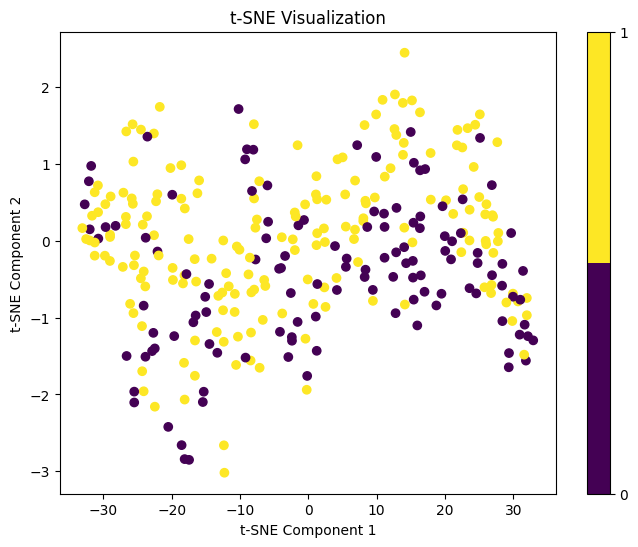

In [252]:
from sklearn.manifold import TSNE

# Assuming X contains your data with shape (n_samples, n_features)
# Normalize your data if necessary
# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_P17)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("viridis", 2))  # Assuming y contains labels
plt.colorbar(ticks=range(2))  # Adjust the number of ticks based on your label values
plt.title("t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [253]:
# # Step 1: Train your models
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'SVC': SVC(kernel='rbf', C=10, gamma='auto'),
#     'SGD Classifier': SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l2')
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)

# # Step 2: Evaluate initial model performance
# initial_performance = {}
# for name, model in models.items():
#     y_pred = model.predict(X_val)
#     initial_performance[name] = accuracy_score(y_val, y_pred)

# print("Initial Model Performance:")
# print(initial_performance)

# # Step 4-7: Perform feature permutation and calculate feature importance
# feature_importance = {}
# for name, model in models.items():
#     importance = np.zeros(X_val.shape[1])
#     for i in range(X_val.shape[1]):
#         X_val_permuted = X_val.copy()
#         np.random.shuffle(X_val_permuted[:, i])
#         y_pred_permuted = model.predict(X_val_permuted)
#         importance[i] = accuracy_score(y_val, y_pred_permuted) - initial_performance[name]
#     feature_importance[name] = importance

# # Step 8: Rank features by importance
# average_importance = np.mean([importance for importance in feature_importance.values()], axis=0)
# sorted_indices = np.argsort(average_importance)[::-1]  # Sort indices in descending order of importance

# print("\nFeature Importance:")
# for i, idx in enumerate(sorted_indices):
#     print(f"Feature {idx}: Importance = {average_importance[idx]}")